## Test patching code to find bugs and edge cases

This uses Ryan's patching code from week 4 (and eventually its updates by the coding team) to create patches on annotated slices

First test on non-annotated slices (original extracts), then add in class annotations

Uses a few randomly selected images from different stains in `/testing_slices` directory

In [1]:
import nbimporter
from Contour_Normal_Gridding import normal_squares_from_contour

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
# get binary image from original image file (white background)
def get_binary_image(image_path):
    """
    Reads an image from the given path, converts it to grayscale,
    and returns a binary thresholded image.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        np.ndarray: Binary (thresholded) image.
    """
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold
    _, whole_thresh = cv2.threshold(image_gray, 1, 255, cv2.THRESH_BINARY) 
    
    return image, whole_thresh

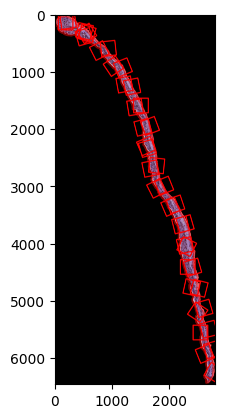

In [17]:
# test on long skinny slice
img_path = './testing_slices/h2114157_h&e_ROI_1 Epithelia.png'
img, img_binary = get_binary_image(img_path)

result_image, contour, squares = normal_squares_from_contour(
    img, 
    img_binary,
    square_size = 256,
    step = 10,
    overlap_thresh = 0.02,
    smoothing_size = 2
)

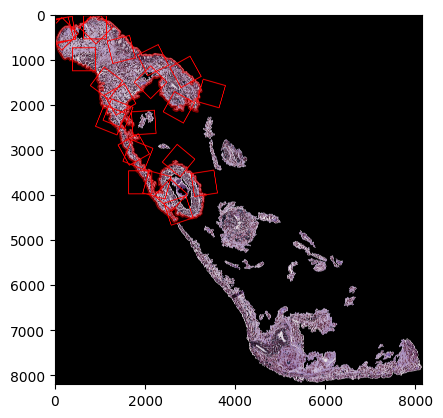

In [19]:
# test on thicker slice, bigger patches
img_path = './testing_slices/h2114155_h&e_ROI_3 Epithelia.png'
img, img_binary = get_binary_image(img_path)

result_image, contour, squares = normal_squares_from_contour(
    img, 
    img_binary,
    square_size = 512,
    step = 10,
    overlap_thresh = 0.02,
    smoothing_size = 2
)

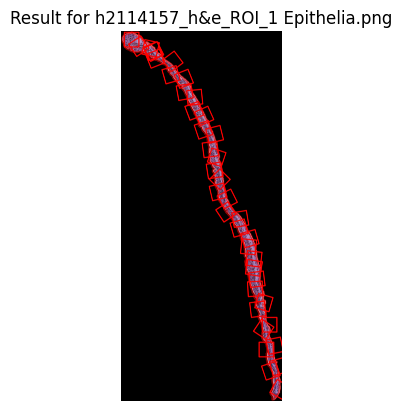

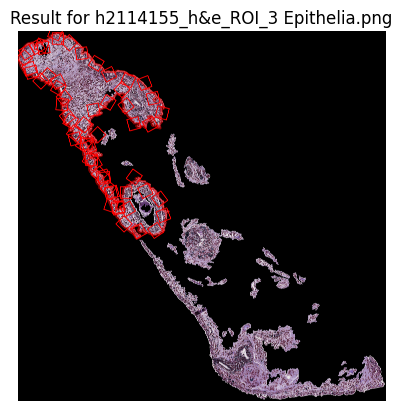

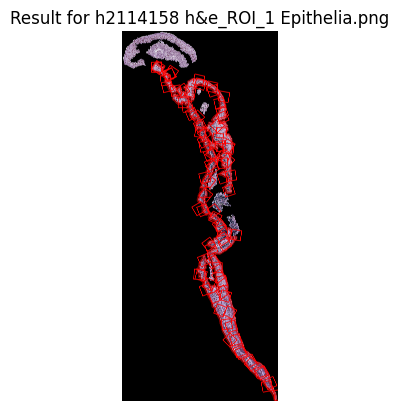

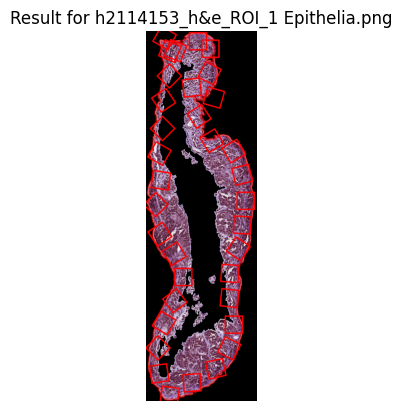

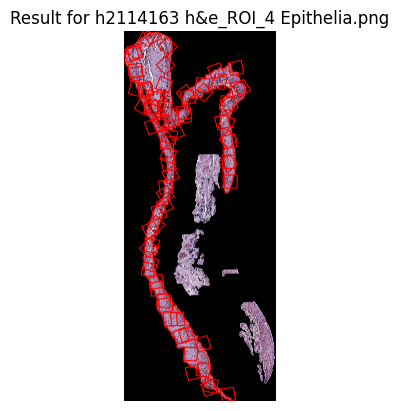

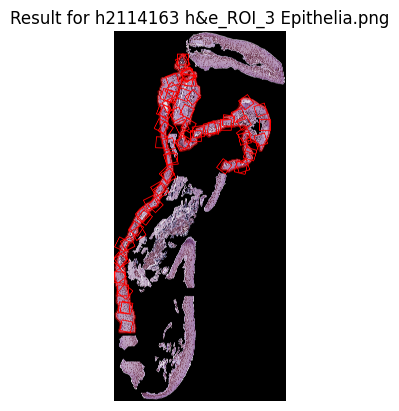

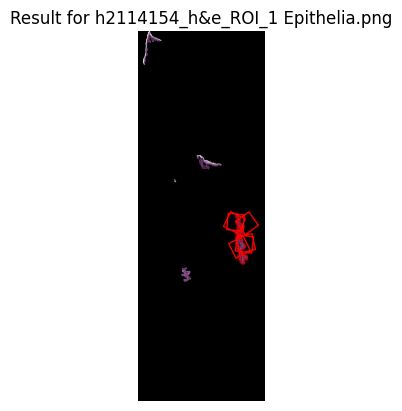

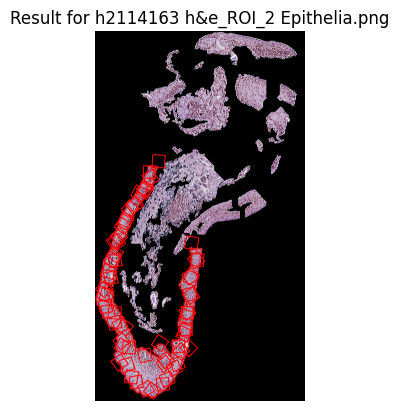

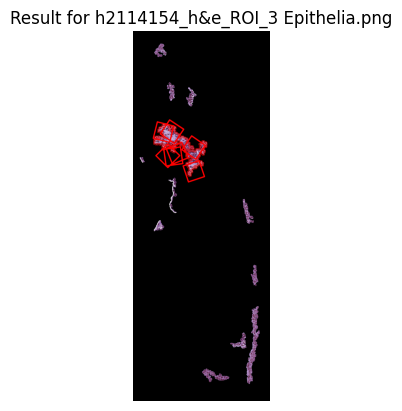

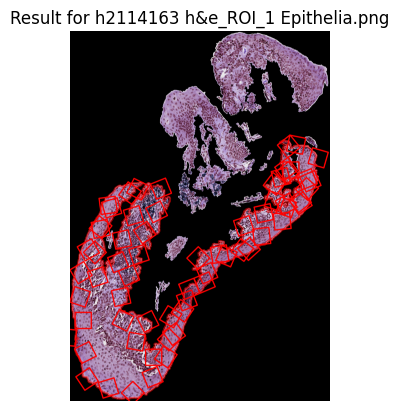

In [21]:
# test on testing_slices folder

# load images from testing directory
image_folder = './testing_slices'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# apply binary then patching to images
for img_file in image_files:

    img_path = os.path.join(image_folder, img_file)

    # convert to binary
    img, img_binary = get_binary_image(img_path)

    # apply patching
    result_image, contour, squares = normal_squares_from_contour(
     img,
     img_binary,
     square_size=256,
     step=5,
     overlap_thresh=0.01,
     smoothing_size=2
     )
    
    # plt.figure(figsize=(10, 5))
    # plt.imshow(result_image, cmap='gray')
    plt.title(f'Result for {img_file}')
    plt.axis('off')
    plt.show()
    plt.close()


## Test updated patching code

This uses Ryan's toggleable patching code from week 5 to create patches on annotated slices

First test on non-annotated slices (original extracts), then add in class annotations

Uses a few randomly selected images from different stains in `/testing_slices` directory

In [1]:
import nbimporter
from Normal_Squares_Toggleable import process_contours

In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon



# Read image and convery to binary
# for images with black backgrounds

image1=cv2.imread("./testing_slices/h2114154_h&e_ROI_1 Epithelia.png")


padding_size = 500
height, width = image1.shape[:2]
new_height = height + 2 * padding_size
new_width = width + 2 * padding_size

new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
new_image[padding_size:padding_size+height, padding_size:padding_size+width] = image1



image1_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
_,whole_thresh=cv2.threshold(image1_gray,1,255,cv2.THRESH_BINARY)


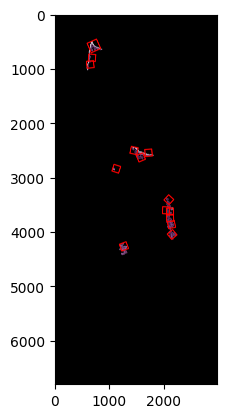

In [5]:
result_image, contour, squares = process_contours(
     new_image,
     whole_thresh,
     square_size=128,
     step=60,
     overlap_thresh=0.1,
     smoothing_size=100,
     look_back=3,
     second_pass=False,
     variable_length=True 
     )